##Setup R in colab
For a new R-notebook, use this link.

https://colab.research.google.com/drive/1oKuFfbJsgOQa9rPCz5pJP0kjHaAE8WJX

or follow this tuterial in:
https://colab.research.google.com/drive/1_MmJuotDr9izNwivjgfD1J_bd4OvTFLq#scrollTo=rtgemyiAvMa1

<table class="tfo-notebook-buttons" align="left">

  <td>
    <a target="_blank" href="https://colab.research.google.com/drive/1NMHorcfpS2A4KvUUIL2_1vsEjqLiRerZ#scrollTo=3jgKv2lqtyXY"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/IshtarMM/Practical_Course"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View sources on GitHub</a>
  </td>
  <td>
    <a href="https://colab.research.google.com/drive/1OuVk9-9sqefHdHOXujnc1CRnOjNH-3-b?usp=sharing"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
</table>

##Step1:
Install required packages one time

In [ ]:
install.packages(c("vegan" , "ggplot"))
install.packages("reshape2")
install.packages(c("plotly"))
install.packages('IRdisplay')
install.packages("ggpubr")
install.packages("ade4")
install.packages("ggrepel")
install.packages("remotes")
remotes::install_github("zdk123/SpiecEasi")



In [ ]:
#Get the list of the packages installed
.libPaths('/usr/local/lib/R/site-library/')
library(vegan)
library(ggplot2)
library(reshape2)
library(plotly)
library(IRdisplay)
library(ggpubr)
library(ade4)
library(SpiecEasi)

##Load datasets from github

In [6]:
shell_call <- function(command, ...) {
  result <- system(command, intern = TRUE, ...)
  cat(paste0(result, collapse = "\n"))
}

shell_call("git clone https://github.com/IshtarMM/Practical_Course")



In [7]:
load("Practical_Course/files.RData")
ls()

[1] "data"       "metadata"   "shell_call" "taxonomy"

In [ ]:
head(data)

,ID,Otu000002,Otu000003,Otu000004,Otu000005,Otu000006,Otu000007,Otu000008,Otu000009,Otu000010,⋯,Otu002106,Otu002107,Otu002108,Otu002109,Otu002110,Otu002111,Otu002112,Otu002113,Otu002114,Otu002115
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
S324,S324,879,1632,22,5,20,1,3,678,546,⋯,0,0,0,3,0,0,0,0,0,0
S71,S71,1948,3020,586,22,12,19670,8652,1011,46,⋯,18,0,0,0,0,0,0,0,0,0
S634,S634,2495,806,493,210,154,0,8,1457,307,⋯,2,5,5,2,0,9,0,1,0,0
S389,S389,18878,968,1091,1157,260,0,19326,378,294,⋯,0,0,0,0,0,0,0,0,0,0
S244,S244,1417,538,71,32,0,1,0,19,59,⋯,0,0,0,2,0,0,0,0,1,0
S309,S309,229,1046,51,75,39,0,0,71,90,⋯,0,0,0,0,0,0,0,5,18,0


In [ ]:
head(metadata)

,ID,Compartment,Year,Season,Geoup
,<chr>,<chr>,<int>,<chr>,<chr>
S324,S324,Endo,2016,Fall,Infected
S71,S71,Endo,2016,Spring,Infected
S634,S634,Epi,2017,Fall,Infected
S389,S389,Endo,2017,Spring,Infected
S244,S244,Epi,2014,Spring,Healthy
S309,S309,Epi,2016,Fall,Healthy


In [ ]:
head(taxonomy)

,OTU,Size,Taxonomy,Kingdom,Phylum,Class,Order,Family,Genus
,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,Otu000002,859665,Bacteria;Proteobacteria;Alphaproteobacteria;Sphingomonadales;Sphingomonadaceae;Sphingomonas;,Bacteria,Proteobacteria,Alphaproteobacteria,Sphingomonadales,Sphingomonadaceae,Sphingomonas
2,Otu000003,291965,Bacteria;Proteobacteria;Alphaproteobacteria;Rhizobiales;Beijerinckiaceae;Methylobacterium-Methylorubrum;,Bacteria,Proteobacteria,Alphaproteobacteria,Rhizobiales,Beijerinckiaceae,Methylobacterium-Methylorubrum
3,Otu000004,286108,Bacteria;Proteobacteria;Gammaproteobacteria;Burkholderiales;Oxalobacteraceae;Duganella;,Bacteria,Proteobacteria,Gammaproteobacteria,Burkholderiales,Oxalobacteraceae,Duganella
4,Otu000005,275753,Bacteria;Proteobacteria;Gammaproteobacteria;Pseudomonadales;Pseudomonadaceae;Pseudomonas;,Bacteria,Proteobacteria,Gammaproteobacteria,Pseudomonadales,Pseudomonadaceae,Pseudomonas
5,Otu000006,272764,Bacteria;Proteobacteria;Gammaproteobacteria;Pseudomonadales;Pseudomonadaceae;Pseudomonas;,Bacteria,Proteobacteria,Gammaproteobacteria,Pseudomonadales,Pseudomonadaceae,Pseudomonas
6,Otu000007,264157,Bacteria;Proteobacteria;Alphaproteobacteria;Rickettsiales;Mitochondria;Mitochondria_ge;,Bacteria,Proteobacteria,Alphaproteobacteria,Rickettsiales,Mitochondria,Mitochondria_ge


In [ ]:
ra_tab <- decostand(data[-c(1)], method="total", MARGIN=1) 
ra_tab$ID <- rownames(ra_tab)
melt_tab <- melt(ra_tab)
colnames(melt_tab) = c("ID","OTU","RelativeAbundance")
head(melt_tab)
tab_taxa <- merge(x =melt_tab , y = taxonomy , by.x  = "OTU" , by.y = "OTU")
agg_tab <- aggregate(tab_taxa[,3], list(tab_taxa$Genus), sum) ## sum of relative abundance of different orders in all samples colnames(agg) = c("order1" , "sumAbundance")
#head(agg_tab)
colnames(agg_tab) <- c("Genus","sumAbundance")
agg_tab$Genus1 <- agg_tab$Genus # copy of this col because i want to have main col and change the order of this column to "other" category
agg_tab$Genus1[agg_tab$sumAbundance <= 20] <- "Other" 
#head(agg_tab) 
#length(unique(agg_tab$Genus1))
tab_taxa1 <- merge(tab_taxa, agg_tab ,by ="Genus")  #add the information of changing orders name to main data frame
tab_taxa1$Genus1 <- reorder(tab_taxa1$Genus1 , tab_taxa1$sumAbundance)
tab_taxa1 <- merge(x =tab_taxa1  , y = metadata, by = "ID")

Using ID as id variables



,ID,OTU,RelativeAbundance
,<chr>,<fct>,<dbl>
1,S324,Otu000002,0.015506474
2,S71,Otu000002,0.040967403
3,S634,Otu000002,0.061518357
4,S389,Otu000002,0.417119625
5,S244,Otu000002,0.032115498
6,S309,Otu000002,0.006111556


ERROR: ignored

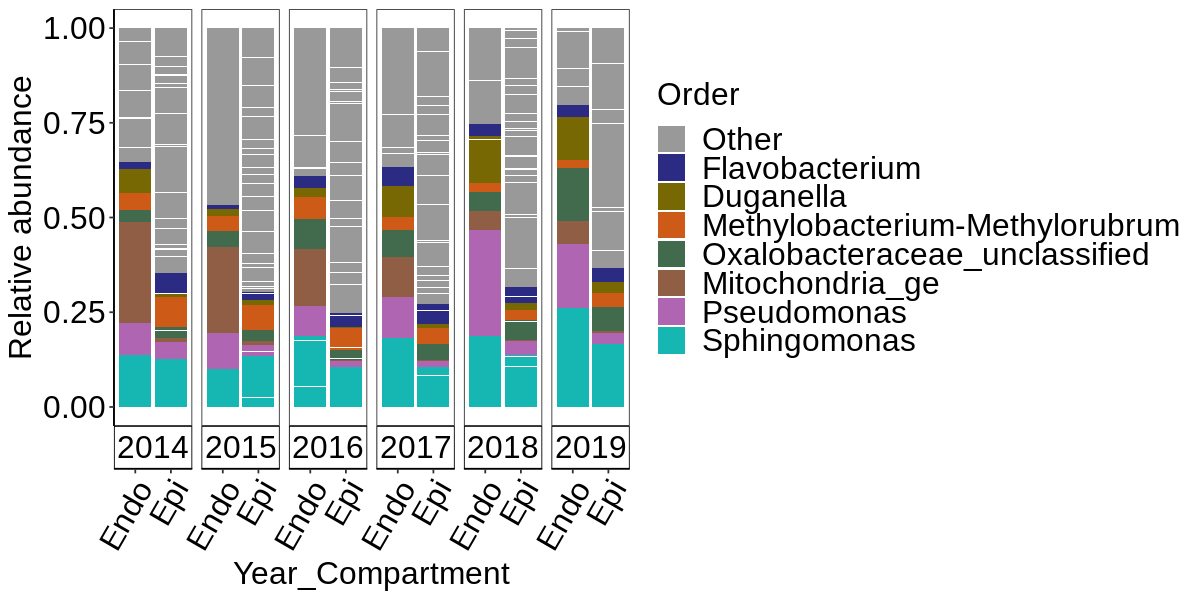

In [ ]:
col <- c("#0F85B0","#FD861E","#F9DA73" , "#16B7B2" , "#AF65B2","#905E45","#416B4C","#CE5A17","#776804","#2B2B83","#999999")

p1 <- ggplot()  + geom_bar(data=tab_taxa1, aes(x=Compartment, y=RelativeAbundance, fill = Genus1), stat="identity", position="fill") +
    facet_wrap(.~ Year, scales = 'free_x' , nrow = 1 , strip.position="bottom")  +
    scale_fill_manual(values=rev(col)) +
    guides(fill=guide_legend(ncol=1))  + 
    theme_bw() + theme(text = element_text(size = 19 , colour = "black"),
                       axis.text = element_text(size = 19 , colour = "black" ),
                       axis.title = element_text(size = 19 , colour = "black" ),
                       strip.text = element_text(size = 19 , colour = "black" ),
                       axis.text.x = element_text(angle = 60, hjust = 1 , colour="black", size = 19),
                       panel.grid.major = element_blank(),
                       panel.grid.minor = element_blank(), 
                       axis.line = element_line(colour = "black") ,
                       legend.title = element_text(color = "black", size = 19),
                       legend.text = element_text(color = "black", size = 19) ,
                       strip.background = element_rect(colour = "black", fill = "white")) +
         ylab("Relative abundance") + xlab("Year_Compartment") + labs(fill = "Order")
options(repr.plot.width=10, repr.plot.height=5)
#ggplotly(p1)
p1
htmlwidgets::saveWidget(ggplotly(p1), "barplot.html")

In [269]:
#Diversity
alpha_div <- data.frame(diversity(data[-c(1)] , index ="shannon"))
colnames(alpha_div) = "ShannonDiversity"
alpha_div <- merge(alpha_div , metadata , by = "row.names")
head(alpha_div)

ERROR: ignored

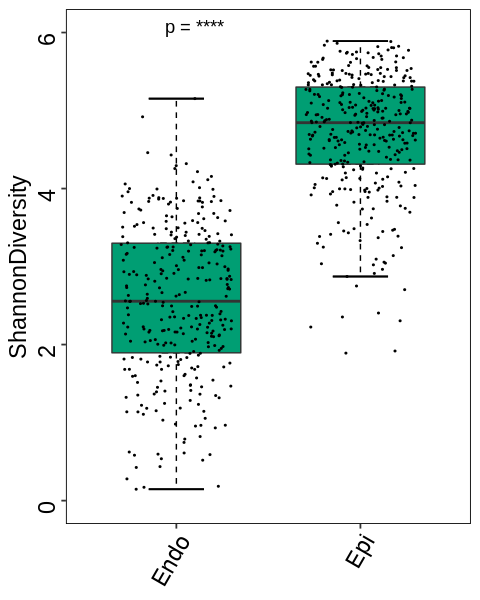

In [ ]:
plot_alpha_diversity <- ggplot( alpha_div, aes(x = Compartment , y = ShannonDiversity))  + 
    geom_boxplot( fill='#009E73', color="black"  , outlier.shape=NA ,width=0.2 , lwd = 0.4 ,linetype = "dashed" , 
                  position = position_dodge(width=6))  + 
    stat_boxplot(aes(ymin = ..lower.., ymax = ..upper..) ,fill='#009E73' ,outlier.shape=NA ,width=0.7 , lwd = 0.4) +
    stat_boxplot(geom = "errorbar", aes(ymin = ..ymax..), width=0.3) +
    stat_boxplot(geom = "errorbar", aes(ymax = ..ymin..) ,width=0.3) + 
    geom_jitter(alpha = 1 , color = "black" , position = position_jitter(width = 0.3) , size = 0.2) + 
    theme(axis.text.x = element_text(angle = 60, hjust = 1 , colour="black", size = 14), 
          axis.text.y = element_text(angle=90, hjust=1 , size = 14 , colour="black" ) , 
          axis.title.y =  element_text(angle=90, size = 14) ,
          axis.title.x = element_blank() ,
          panel.background = element_rect(colour = "black" , fill = "NA"),
          panel.grid.major = element_blank(), panel.grid.minor = element_blank()) + ylim(0,6) +
    stat_compare_means(aes(label = paste0("p = ", ..p.signif..)) , method = "wilcox.test")
options(repr.plot.width=4, repr.plot.height=5)
plot_alpha_diversity

Saving 6.67 x 6.67 in image



ERROR: ignored

Warning message in dudi.pco(vegdist(data[-c(1)], method = "bray", binary = FALSE), :
“Non euclidean distance”


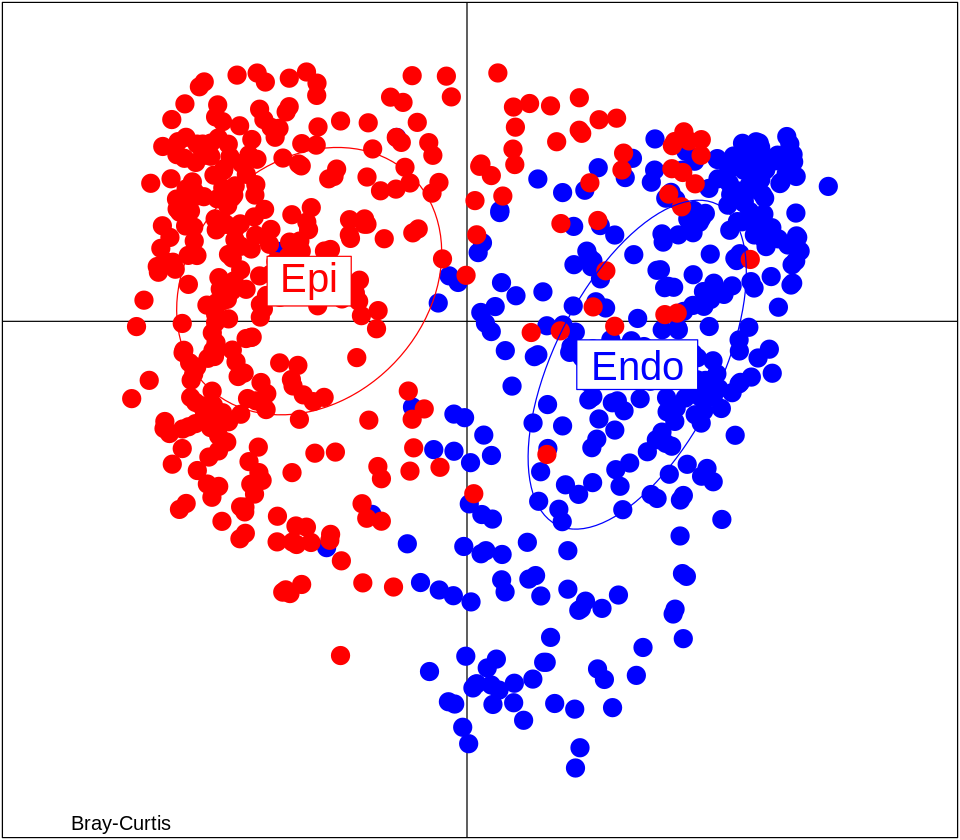

In [ ]:
pca_bray_rarefied.tab <- dudi.pco(vegdist(data[-c(1)], method="bray", binary=FALSE), scannf=F)
metadata$Compartment <- as.factor(metadata$Compartment)
options(repr.plot.width=8, repr.plot.height=7)
s.class(pca_bray_rarefied.tab$li, metadata$Compartment, xax=1, yax=2, cpoint=3, grid=F, addaxes=T, cellipse=1, cstar=0, axesell=0, col = c("blue","red"), clabel = 2, sub="Bray-Curtis")

In [ ]:
installed.packages("SpiecEasi")

Package,LibPath,Version,Priority,Depends,Imports,LinkingTo,Suggests,Enhances,License,License_is_FOSS,License_restricts_use,OS_type,Archs,MD5sum,NeedsCompilation,Built


In [171]:


data_net <- data.frame(t(data[-c(1)]))
dim(data_net)
data_net$OTU <- rownames(data_net)
data_net <- merge(taxonomy[c("OTU" ,"Genus")] , data_net , by = "OTU")
data_net$OTU_Genus <- paste(data_net$OTU , data_net$Genus , sep = "_")
rownames(data_net) <- data_net$OTU_Genus
data_net <- subset(data_net , select = -c(OTU , Genus , OTU_Genus))
data_net <- data_net[rowSums(data_net)>=1000 , ]
dim(data_net)

[1] 1911  661

[1] 795 661

In [ ]:
sparcc.data <- sparcc(t(data_net))

In [242]:

## Define arbitrary threshold for SparCC correlation matrix for the graph
sparcc.graph <- abs(sparcc.data$Cor) >= 0.3
diag(sparcc.graph) <- 0
library(Matrix)
sparcc.graph <- Matrix(sparcc.graph, sparse=TRUE)
## Create igraph objects
ig.sparcc <- adj2igraph(sparcc.graph)

In [254]:
rownames(sparcc.data$Cor) <- rownames(data_net)
colnames(sparcc.data$Cor) <- rownames(data_net)
sparcc.graph <- abs(sparcc.data$Cor) >= 0.3
diag(sparcc.graph) <- 0
#sort(rowSums(sparcc.graph))
sparcc.graph = sparcc.graph[rowSums(sparcc.graph)>=4,]
sparcc.graph = sparcc.graph[,(colnames(sparcc.graph) %in% rownames(sparcc.graph))]
library(Matrix)
sparcc.graph <- Matrix(sparcc.graph, sparse=TRUE)
## Create igraph objects
ig.sparcc <- adj2igraph(sparcc.graph,vertex.attr = list(name = rownames(sparcc.graph) ,ff = 1:nrow(sparcc.graph) ) )

In [255]:
dim(sparcc.graph)


[1] 186 186

In [260]:
#out2 <- sparccboot(t(data_net), R = 10)

#outP <- pval.sparccboot(out2)
#cors <- outP$cors

#sparCCpcors <- diag(0.5, nrow = dim(sparcc.data$Cor)[1], ncol = dim(sparcc.data$Cor)[1])
#sparCCpcors[upper.tri(sparCCpcors, diag=FALSE)] <- cors
#sparCCpcors <- sparCCpcors + t(sparCCpcors)

#rownames(sparCCpcors) <- rownames(data_net)
#colnames(sparCCpcors) <- rownames(data_net)

#sparCCpcors[1:5, 1:5]

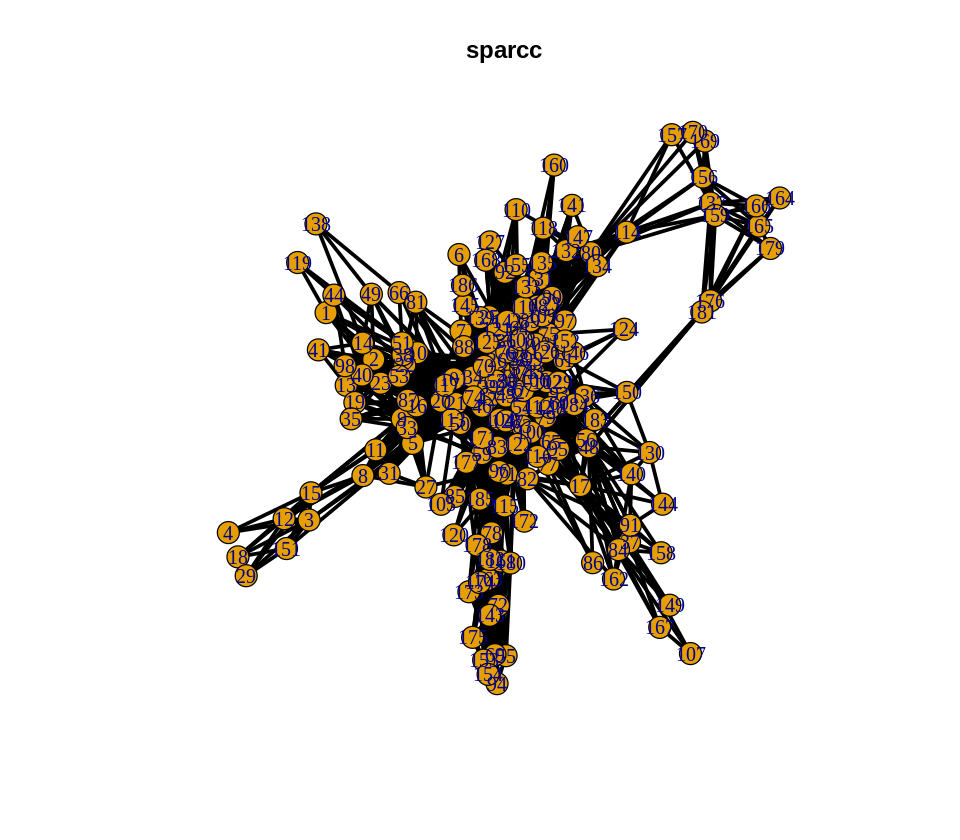

In [261]:
options(repr.plot.width=8, repr.plot.height=7)
plot(ig.sparcc, vertex.label=1:nrow(sparcc.graph), main="sparcc" , vertex.size=8 , edge.color = "black" , edge.width = 3 )


In [263]:
closeness<- data.frame(closeness(ig.sparcc , mode = "all" , weights = NA))
betweenness <- data.frame(betweenness(ig.sparcc , directed = F , normalized = TRUE))
degree <- data.frame(degree(ig.sparcc, mode="all"))
net_analysis <- cbind(closeness , betweenness[1] , degree)
colnames(net_analysis) <- c("ClosenessCentrality" , "BetweennessCentrality" , "degree")
taxonomy$OTU_Genus <- paste(taxonomy$OTU , taxonomy$Genus , sep = "_")
net_analysis <- merge(net_analysis , taxonomy , by.x = "row.names" , by.y = "OTU_Genus")
colnames(net_analysis)[1] <- "OTU_Genus"
#net_analysis <- na.omit(net_analysis)      
#net_analysis <- net_analysis[!(net_analysis$ClosenessCentrality==1 &net_analysis$BetweennessCentrality==0), ]


ERROR: ignored

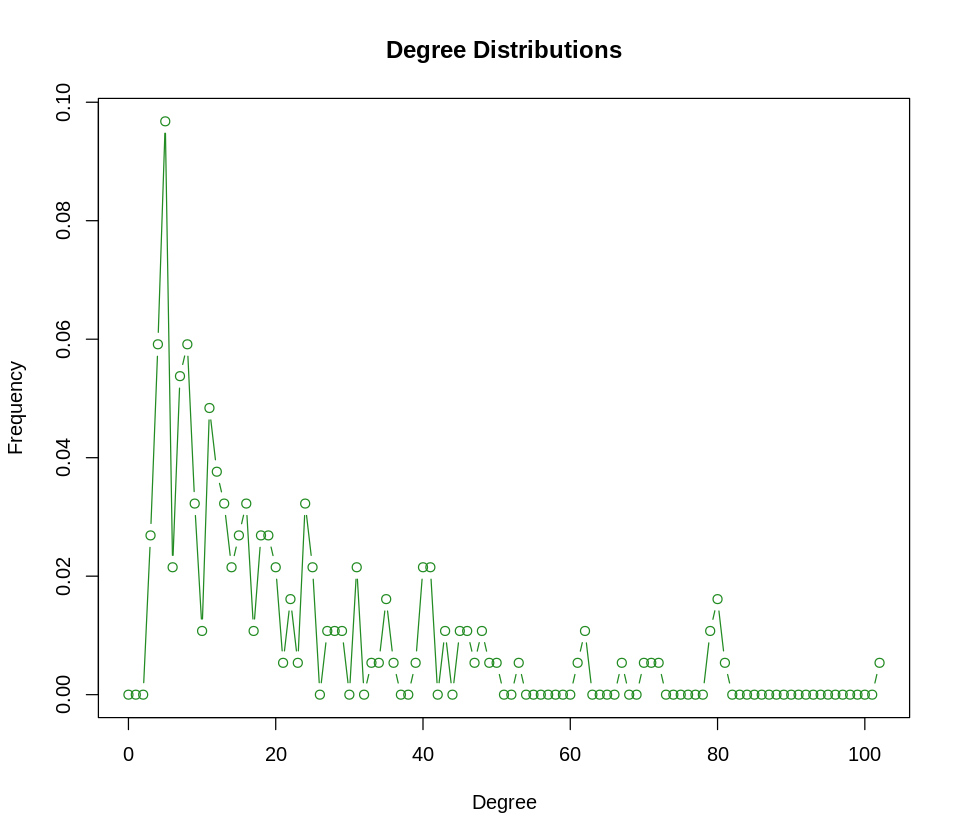

In [265]:
dd.sparcc <- degree.distribution(ig.sparcc)
plot(0:(length(dd.sparcc)-1), dd.sparcc, type='b',
      ylab="Frequency", xlab="Degree", main="Degree Distributions" ,col="forestgreen")
legend("topright",col=c("forestgreen"), pch=1, lty=1)

In [266]:
#plot hub
n <- 5 #threshold for Hub
library(ggrepel)
top5_BC <- net_analysis[net_analysis$BetweennessCentrality > quantile(net_analysis$BetweennessCentrality,prob=1-n/100),]$OTU_Genus

top5_BC_min<-min(net_analysis[net_analysis$BetweennessCentrality > quantile(net_analysis$BetweennessCentrality,prob=1-n/100),]$BetweennessCentrality)

top5_CC<-net_analysis[net_analysis$ClosenessCentrality > quantile(net_analysis$ClosenessCentrality,prob=1-n/100),]$OTU_Genus
  
top5_CC_min<-min(net_analysis[net_analysis$ClosenessCentrality > quantile(net_analysis$ClosenessCentrality,prob=1-n/100),]$ClosenessCentrality)
  
p5_Intersection <- top5_BC[which((top5_BC %in% top5_CC) == TRUE)]
  
p5_IntersectionH = p5_Intersection
length(p5_IntersectionH)
core = as.data.frame(p5_IntersectionH)
core$core = "yes"
colnames(core) = c("Species" , "Hub")
select = subset(net_analysis, !(OTU_Genus %in% core$Species))
select$core = "No"
select1 = select[,c("OTU_Genus","core")] #take name and core info
colnames(select1) = c("Species" , "Hub")
newnet_analysis = rbind(select1 , core)
#newnet_analysis$sort = seq(1,nrow(newnet_analysis))
newnet_analysisH = merge(x = net_analysis , y = newnet_analysis , by.x = "OTU_Genus" , by.y = "Species")
expression <- ggplot(newnet_analysisH, aes(x = ClosenessCentrality, y= BetweennessCentrality , label=Genus)) 
z <- expression + geom_point(aes(colour=degree , size = degree) ,stat= "identity",position="identity",alpha= 0.4 ) + 
    scale_colour_gradient(low = "blue", high = "red") + 
    labs(title = "Hub analysis") +
    scale_size_area(max_size = 10)+
    geom_vline(xintercept = top5_CC_min, linetype="dashed") +
    geom_hline(yintercept = top5_BC_min, linetype= "dashed") +
    scale_x_continuous("Closeness Centrality") +
    scale_y_continuous("Betweenness Centrality") +
    scale_shape_manual(values=c(21, 19)) +
    geom_text_repel(data=subset(newnet_analysisH, Hub=="yes"),size = 7,
                    box.padding   = 1.5,
                    point.padding = 0.5,
                    force         = 100,
                    segment.size  = 0.4,
                    segment.color = "darkgreen") +
    theme_bw()+theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank()) + 
    theme(text = element_text(size=15))



[1] 6

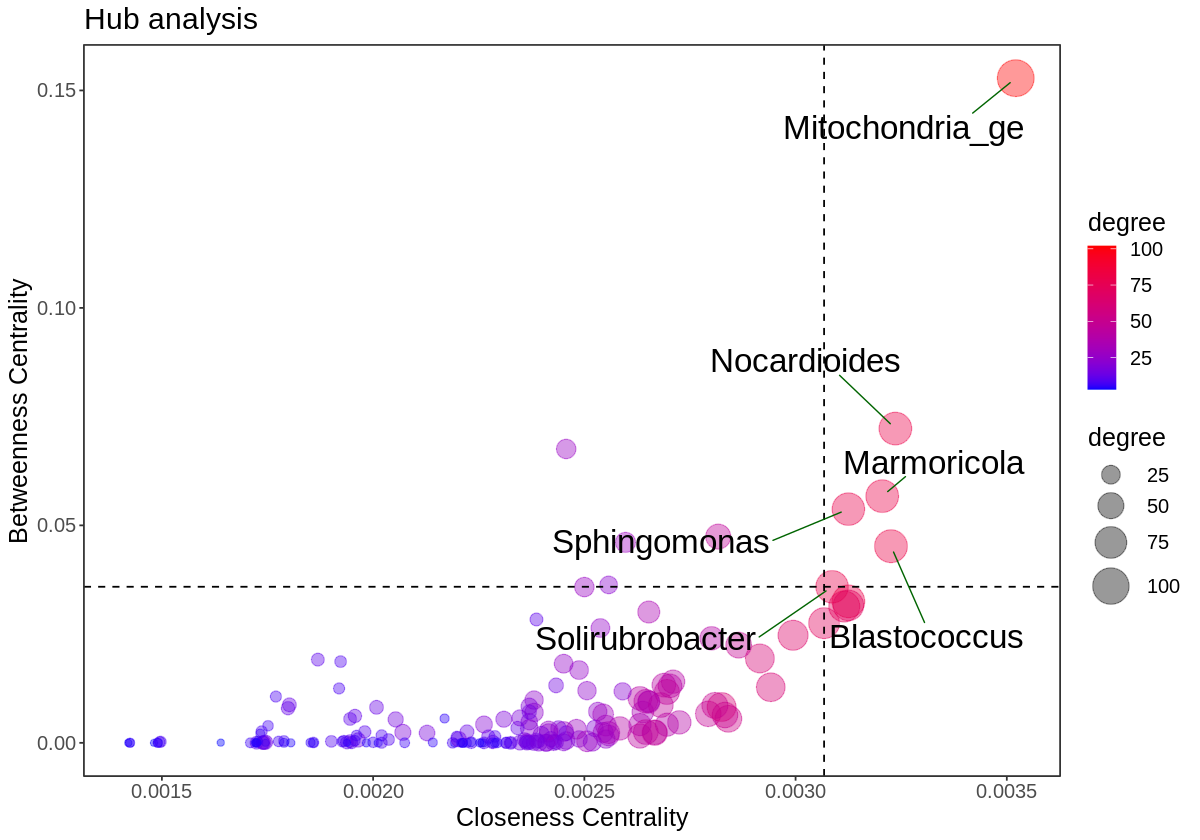

In [267]:
options(repr.plot.width=10, repr.plot.height=7)
z

In [282]:
ggsave("x.png" ,z)
htmlwidgets::saveWidget(ggplotly(z), "x.html")

Saving 6.67 x 6.67 in image

Warning message:
“`gather_()` was deprecated in tidyr 1.2.0.
Please use `gather()` instead.
This warning is displayed once every 8 hours.
Call `lifecycle::last_lifecycle_warnings()` to see where this warning was generated.”
Warning message in geom2trace.default(dots[[1L]][[1L]], dots[[2L]][[1L]], dots[[3L]][[1L]]):
“geom_GeomTextRepel() has yet to be implemented in plotly.
  If you'd like to see this geom implemented,
  Please open an issue with your example code at
  https://github.com/ropensci/plotly/issues”


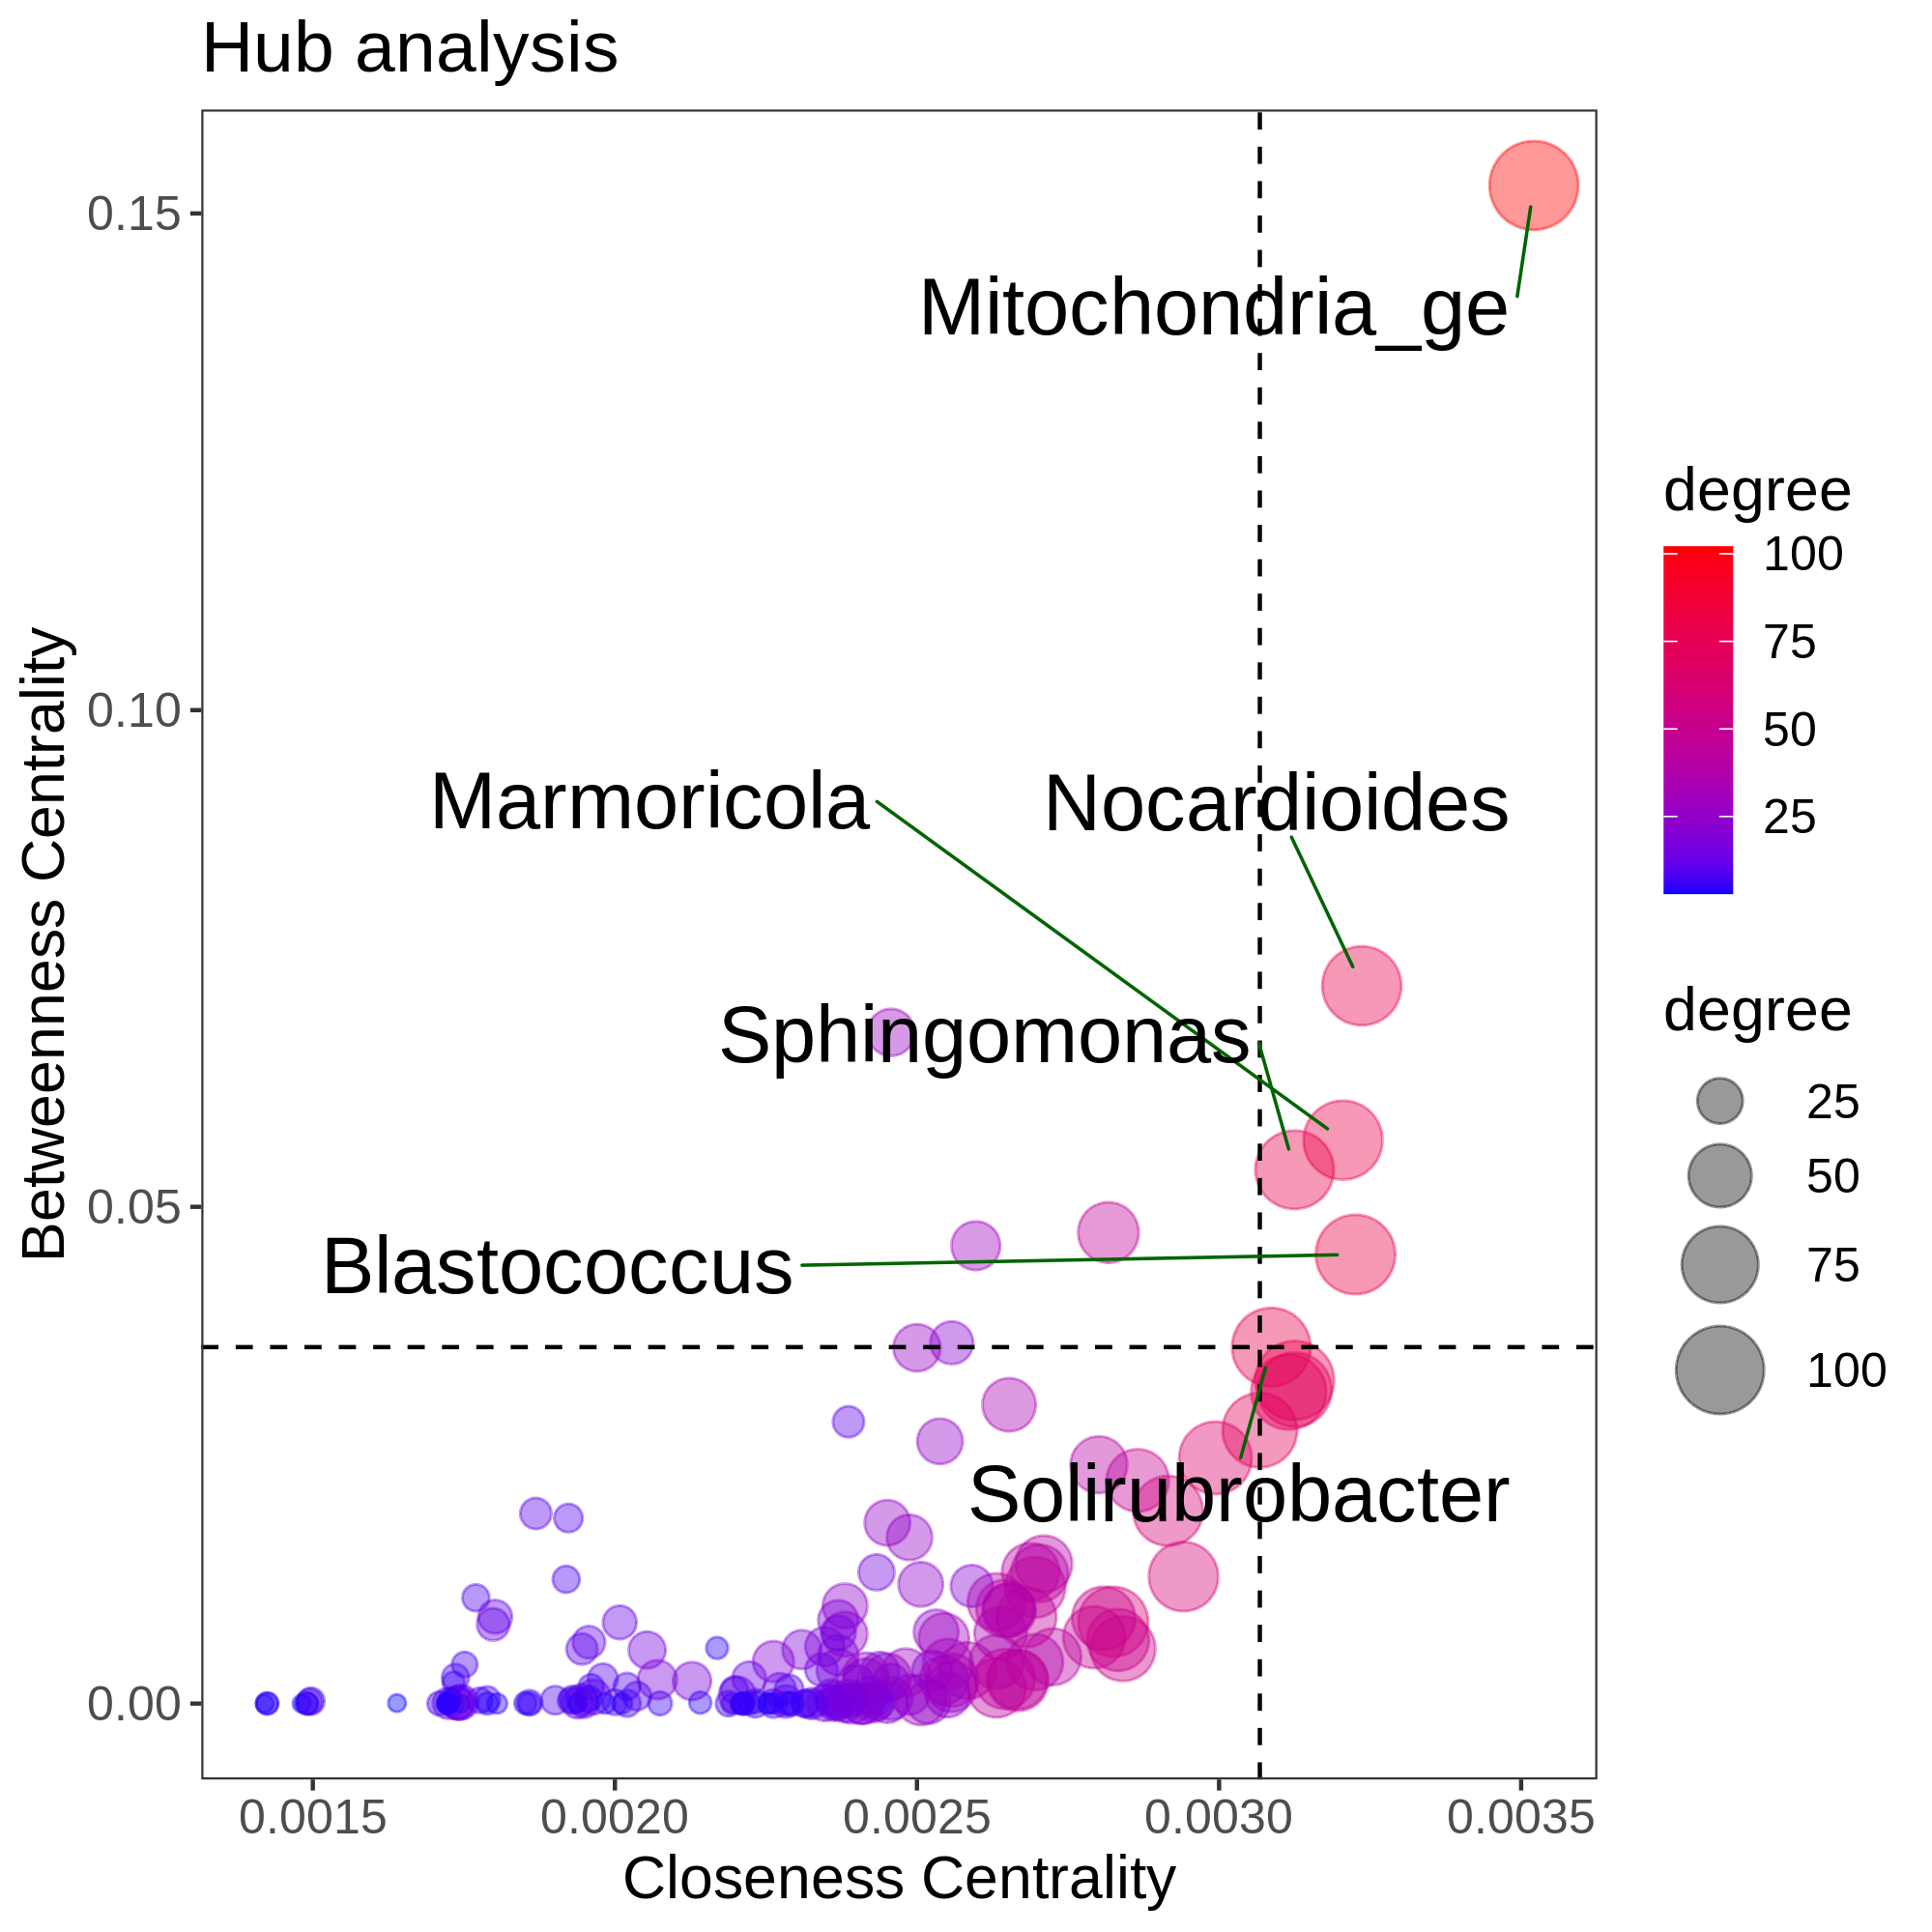

In [309]:
library("IRdisplay")
display_png(file="x.png", width = 200, height = 200  ) 
#how to open html files?

